## SVM (Support Vector Machine)
Link: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series,DataFrame
%matplotlib inline

In [2]:
# importing data
df = pd.read_csv('./breast-cancer-wisconsin-data/data.csv')

### Data Preprocessing

In [3]:
# printing the keys
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
# removing unwanted columns from the dataset
features_to_delete = ['perimeter_mean', 'area_mean','perimeter_se', 'area_se','radius_worst', 'perimeter_worst','concavity_mean', 
                 'compactness_mean','concavity_worst', 'concave points_worst','fractal_dimension_mean','texture_se',
                  'smoothness_se','symmetry_se','diagnosis','Unnamed: 32','id']
x=df.drop(features_to_delete,axis=1)
x.shape

(569, 16)

In [7]:
# Define input values, or X by dropping the target values:
X = df.drop(['diagnosis'], axis = 1)

# Define output values - this is the target:
y = df['diagnosis']

In [8]:
# label encoding of the dependent variable
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
y = le.fit_transform(y)

* `Label Encoding` refers to converting the labels into a `numeric` form so as to convert them into the `machine-readable` form. Machine learning algorithms can then decide a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
* `Limitations:`Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues in the training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.

### Splitting data into training and testing sets

In [9]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,  # test data is 20% of total data
                                                    random_state = 16) # random_state shuffles the data with every execution
                                                                               
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)

Shape of x_train : (426, 16)
Shape of x_test : (143, 16)


In [10]:
# imports for training data
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# Training the model:
svc_model = SVC()

In [12]:
# feeding the training set into the model
svc_model.fit(x_train,y_train)

SVC()

In [13]:
# predicting the test set results
y_predict = svc_model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

#### Confusion Matrix

In [14]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

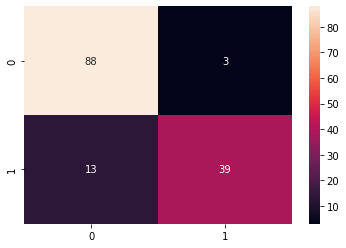

In [15]:
# Quick overview of our confusion matrix:
sns.heatmap(cm, annot = True)

### Improving the model

In [16]:
# Perform normalisation:
min_train = x_train.min()
range_train = (x_train-min_train).max()
x_train_scaled = (x_train - min_train)/range_train

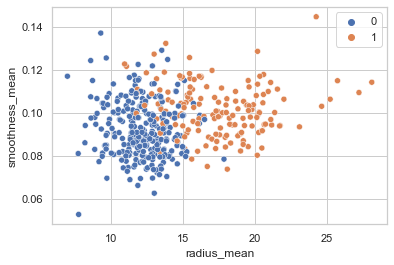

In [17]:
# Training data without scaling:
sns.set(style='whitegrid')
fig = sns.scatterplot(x = x_train['radius_mean'], y= x_train['smoothness_mean'], hue = y_train)

<AxesSubplot:xlabel='radius_mean', ylabel='smoothness_mean'>

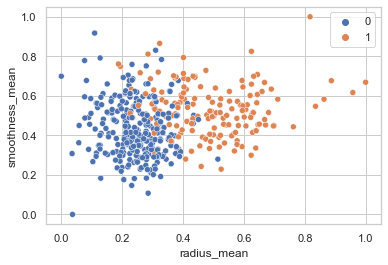

In [18]:
# Scaled training data:
sns.set(style='whitegrid')
sns.scatterplot(x = x_train_scaled['radius_mean'], y= x_train_scaled['smoothness_mean'], hue = y_train)

`Scaling:` Transforming the data so that it fits within a specific scale. A part of data preprocessing. Makes it better for analysis of data.

In [19]:
# Performing normalisation for test data:
min_test = x_test.min()
range_test = (x_test - min_test).max()
x_test_scaled = (x_test - min_test)/range_test

In [20]:
# Retraining the model:
svc_model.fit(x_train_scaled, y_train)

SVC()

In [21]:
y_predict = svc_model.predict(x_test_scaled)

#### Confusion matrix of improved model

In [22]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

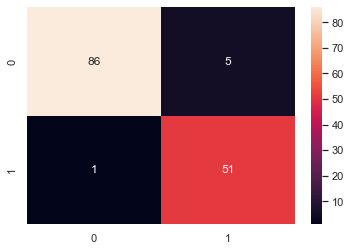

In [23]:
# confusion matrix of improved model
sns.heatmap(cm, annot = True)

In [24]:
# printing classification report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        91
           1       0.91      0.98      0.94        52

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



#### Optimising C and gamma parameters
Link: https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be

**C parameter** in SVM is `Penalty parameter` of the error term. You can consider it as the degree of correct classification that the algorithm has to meet or the degree of optimization the the SVM has to meet. For greater values of C, there is no way that SVM optimizer can misclassify any single point.

The **gamma parameter** defines how far the influence of a single training example reaches, with `low values meaning 'far'` and `high values meaning 'close'`. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

`RBF Kernel:` https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a

In [25]:
param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

#### Using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose=4)  # parameter tuning

In [28]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.965 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.941 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

#### Using RandomizedSearchCV 
* GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive.
* RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.


In [34]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose=4)  # parameter tuning
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.965 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.988 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.976 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.942 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   verbose=4)

In [29]:
# Selects the best values for c and gamma parameters:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [30]:
grid_predictions = grid.predict(x_test_scaled)

#### Confusion matrix after optimising gamma and C parameters

In [31]:
cm = confusion_matrix(y_test, grid_predictions)

<AxesSubplot:>

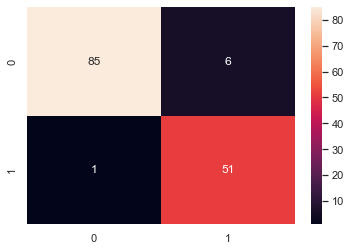

In [32]:
sns.heatmap(cm, annot = True)

In [33]:
# printing classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        91
           1       0.89      0.98      0.94        52

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143

